In [2]:
import numpy as np
import scipy
import pandas as pd

## Задача 1 <br>
Для начала нужно применить множественную проверку гипотез и скоректировать pvalue. Применим, метод Холма, так как он один из самых простых, и тогда получим следующую таблицу. 

In [9]:
frame = pd.DataFrame()
frame['метод'] = ['хи-квадрат', 'Лил-лиефорса', '$K^2$', 'Шапиро-Уилка']
frame['pvalue'] = [' 0.54', '0.23', '0.047', '0.007']
frame['преобразуем по методу Холма'] = ['*1', '*2', '*3', '*4']
frame['pvalue после метода Холма'] = ['0.54', '0.46', '0.141', '0.028']

frame

,метод,pvalue,преобразуем по методу Холма,pvalue после метода Холма
0,хи-квадрат,0.54,*1,0.54
1,Лил-лиефорса,0.23,*2,0.46
2,$K^2$,0.047,*3,0.141
3,Шапиро-Уилка,0.007,*4,0.028


Видим, что если выбрать критерий значимости $\alpha$ таким, что $\alpha \leq 0.028$, то все хорошо и мы определенно принимаем гипотезу, так как все скорректированные pvalue получились > $\alpha$ и то есть все критерии говорят о принятии гипотезы. Если же $\alpha \geq 0.028$, то рассмотрим вероятность ошибки первого рода. <br>
$FWER = P(ошибка \;1 \;рода) = P(V > 0)$ , где {V > 0} = {есть верные гипотезы среди отвергнутых} <br>
Мы ограничиваем ошибку первого рода, то есть хотим, чтобы $FWER = P(V > 0) \leq \alpha \; \forall P$. То есть суть в том, что это должно выполняться для любого критерия. (и при этом если мы принимаем гипотезу, то мы принимаем ее везде). Поэтому если мы отвергнем гипотезу, то как раз получим, что $FWER = P(V > 0) \leq \alpha \; \forall P$ <br>
То есть нужно отвергнуть гипотезу о нормальности.

## Задача 2

Сделаем замену $y = F_0(x)$. Тогда получим 
$$\Omega_n^2 = \int_{R} \frac{(F_n^*(F_0^{-1}(y) - y)^2}{(1-y)y} dy$$
Рассмотрим $F_n^*(F_0^{-1}(y))$:
$$F_n^*(F_0^{-1}(y)) = \frac{1}{n} \sum I(X_i \leq F_0^{-1}(y)) = \frac{1}{n} \sum I(F_0(X_i) \leq y)$$
Заметим, что $F_0(X_i) \sim U[0, 1]$ при верности гипотезы $H_0$ <br>
Тогда получим, что в этом случае (при верности $H_0$) эта статистика будет всегда стремиться к одному определенному распределению.


## Задача 3

In [95]:
import numpy as np
import pandas as pd
import scipy.stats as sps
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [96]:
data = pd.read_csv('slump_test.csv', encoding='latin1')
data.head()

,No,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,1,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,2,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,3,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,4,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,5,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [97]:
X = np.array(data['Compressive Strength (28-day)(Mpa)'])

Сначала, посмотрим на гистограмму

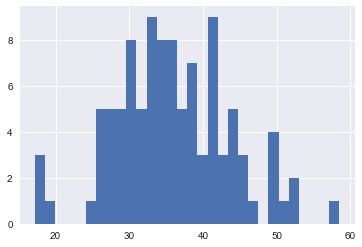

In [98]:
plt.hist(X, bins=30)
plt.show()

Судя по гистограмме распределение похоже на нормальное.

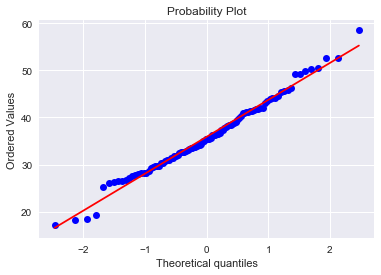

In [99]:
qq_plot = sps.probplot(X, plot=plt)

Значения лежат примерно на одной прямой, что еще раз говорит, что распределение похоже на нормальное. <br>
Поэтому сначала проверим выборку на нормальность. Это лучше всего делать критерием Шапиро-Уилка. Выберем уровень доверия $\alpha =0.05$

In [100]:
result = sps.shapiro(X)
print('Статристика критерия: ', result[0])
print('pvalue: ', result[1])

Статристика критерия:  0.9875738620758057
pvalue:  0.46270275115966797


Как видим, pvalue получился достаточно большим, поэтому гипотезу о нормальности не отвергаем на уровне значимости $\alpha = 0.05$

## Задача 4

In [102]:
data = pd.read_csv('abalone.data', names=["Sex", "Length", "Diameter", "Height", "Whole weight", "Shucked weight",\
                                        "Viscera weight", "Shell weight", "Rings"])
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [104]:
X = np.array(data['Shell weight'])

Аналогично, посмотрим сначала на гистограмму.

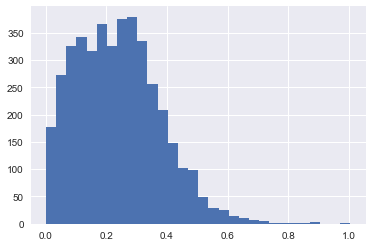

In [105]:
plt.hist(X, bins=30)
plt.show()

Получили что-то похожее на эсконенциальное, бета-распределение или распределение Вейбулла

Посмотрим на QQ-plot для разных распределений

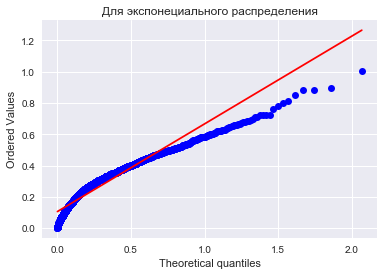

In [111]:
params = sps.expon.fit(X)
stats.probplot(X, plot=plt, dist='expon', sparams=params)
plt.title('Для экспонециального распределения')
plt.show()

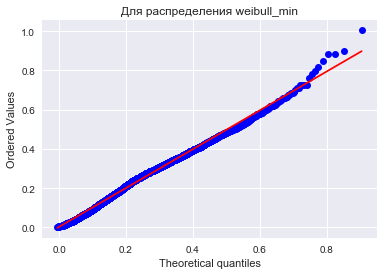

In [113]:
params = sps.weibull_min.fit(X)
stats.probplot(X, plot=plt, dist='weibull_min', sparams=params)
plt.title('Для распределения weibull_min')
plt.show()

/anaconda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:427: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


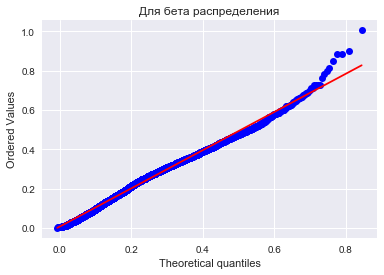

In [115]:
params = sps.beta.fit(X)
stats.probplot(X, plot=plt, dist='beta', sparams=params)
plt.title('Для бета распределения')
plt.show()

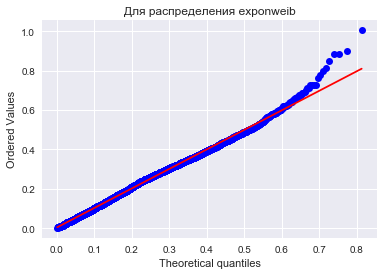

In [116]:
params = sps.exponweib.fit(X)
stats.probplot(X, plot=plt, dist='exponweib', sparams=params)
plt.title('Для распределения exponweib')
plt.show()

QQ-plot для последних трех распределений лежит примерно на одной прямой.

Теперь посмотрим на критерий Колмогорова-Смирнова на разных распределениях

Бета распределение

In [122]:
params = sps.beta.fit(X)
sps.kstest(X, 'beta', args=params)

/anaconda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:427: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


KstestResult(statistic=0.04922617740263402, pvalue=3.231227281399668e-09)

Exponweib

In [123]:
params = sps.exponweib.fit(X)
sps.kstest(X, 'exponweib', args=params)

KstestResult(statistic=0.034147867304984425, pvalue=0.00011759562175652074)

Экспоненциальное

In [124]:
params = sps.expon.fit(X)
sps.kstest(X, 'expon', args=params)

KstestResult(statistic=0.17103345568811776, pvalue=1.4803203417732548e-106)

Weibull_min

In [126]:
params = sps.weibull_min.fit(X)
sps.kstest(X, 'weibull_min', args=params)

KstestResult(statistic=0.04422368807734245, pvalue=1.604859301891065e-07)

Нормальное

In [131]:
params = sps.norm.fit(X)
sps.kstest(X, 'norm', args=params)

KstestResult(statistic=0.047466738420462284, pvalue=1.3384384111418007e-08)

Как видим, гипотезу о принадлежности выборки реаспределениям, рассмотренным выше можно отвергнуть. <br>
После долгих попыток, было найдено распределение, на котором получается хорший pvalue и гипотезу о принадлежности к этому распределению можно принять.

In [132]:
params = sps.burr.fit(X)
sps.kstest(X, 'burr', args=params)

/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1037: RuntimeWarning: invalid value encountered in subtract
  mu2 = mu2p - mu * mu
/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2306: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


KstestResult(statistic=0.014469978035716813, pvalue=0.34600940979205835)